In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:] # Avoiding dummy variable trap!

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [3]:
# Par 2 - Making the ANN
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

# Initializing the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer with dropout
# Number of hidden layer nodes: (11(number of input) + 1(number of output))/2
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer with dropout
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN to the Training set
h = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), 
                   batch_size = 25, epochs = 300, verbose = 0)

Using TensorFlow backend.
W1001 16:16:16.105565  8968 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1001 16:16:16.138325  8968 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1001 16:16:16.146312  8968 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1001 16:16:16.208141  8968 deprecation_wrapper.py:119] From C:\Users\Hong\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1001 16:16:16.231120  8968 deprecation_wrapper.py:119] Fr

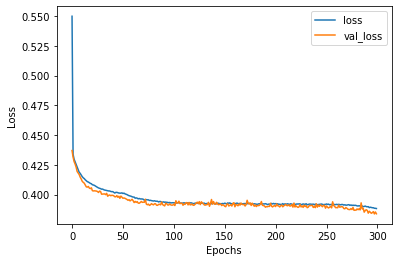

In [4]:
# Plotting the loss
plt.plot(h.history['loss'], label = 'loss')
plt.plot(h.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
X_set, y_set = X_train, y_train
y_hat = classifier.predict(X_set)
y_hat = np.reshape(y_hat, -1)
y_hat[y_hat >= 0.5] = 1
y_hat[y_hat < 0.5] = 0

cm = confusion_matrix(y_set, y_hat)
accuracy = (cm[0, 0] + cm[1, 1])/cm.sum()
TPR = cm[0, 0]/cm[:, 0].sum() # Sensitivitive, Recall
TNR = cm[1, 1]/cm[:, 1].sum() # Specificitive
PPV = cm[0, 0]/cm[0, :].sum() # Positive Predictive Value, Precision
NPV = cm[1, 1]/cm[1, :].sum() # Negative Predictive Value,  
F1_score = 2/(1/PPV + 1/TPR)
summary = {'Accuracy': accuracy, 
           'Positive_Predictive_Value': PPV, 
           'Negative_Predictive_Value': NPV,            
           'Sensitivitive': TPR, 
           'Specificitive': TNR,            
           'F1_score': F1_score}
summary

{'Accuracy': 0.840125,
 'Positive_Predictive_Value': 0.9739321608040201,
 'Negative_Predictive_Value': 0.3180147058823529,
 'Sensitivitive': 0.8478468899521531,
 'Specificitive': 0.7576642335766424,
 'F1_score': 0.9065263465614265}

In [6]:
# Predicting a new data
RowNumber = [0]
CustomerId = [0]
Surname = ["name"]
CreditScore = [600]
Geography = ["France"]
Gender = ["Male"]
Age = [40]
Tenure = [3]
Balance = [60000]
NumOfProducts = [2]
HasCrCard = [1]
IsActiveMember = [1]
EstimatedSalary = [50000]

X_new_dict = {
        'RowNumber': RowNumber,
        'CustomerId': CustomerId,
        'Surname': Surname,
        'CreditScore': CreditScore,
        'Geography': Geography,
        'Gender': Gender,
        'Age': Age,
        'Tenure': Tenure,
        'Balance': Balance,
        'NumOfProducts': NumOfProducts,
        'HasCrCard': HasCrCard,
        'IsActiveMember': IsActiveMember,
        'EstimatedSalary': EstimatedSalary   
}
X_new_df = pd.DataFrame(X_new_dict)
X_new = X_new_df.iloc[:, 3:13].values

X_new[:, 1] = labelencoder_X_1.transform(X_new[:, 1])
X_new[:, 2] = labelencoder_X_2.transform(X_new[:, 2])
X_new = onehotencoder.transform(X_new).toarray()
X_new = X_new[:, 1:] # Avoiding dummy variable trap!
X_new = sc.transform(X_new)

y_new_pred = classifier.predict(X_new)
y_new_pred = (y_new_pred > 0.5)
y_new_pred

array([[False]])

In [7]:
# Example
a = np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])
a = sc.transform(a)
a_pred = classifier.predict(a)
a_pred = (a_pred > 0.5)
a_pred

array([[False]])

In [11]:
# Part 4 - Evaluating, Improving and Tuning the ANN
# Improving the ANN
# Dropout Regularization to reduce overfitting if needed
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 50], 
              'epochs': [300], 
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, 
                           param_grid = parameters, 
                           scoring = 'accuracy',
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 0)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
results = grid_search.cv_results_

Epoch 1/100
8000/8000 [==============================] - 1s 106us/step - loss: 0.5476 - acc: 0.7954
Epoch 2/100
8000/8000 [==============================] - 0s 46us/step - loss: 0.4351 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 0s 47us/step - loss: 0.4285 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 0s 43us/step - loss: 0.4247 - acc: 0.8001
Epoch 5/100
8000/8000 [==============================] - 0s 45us/step - loss: 0.4197 - acc: 0.8210
Epoch 6/100
8000/8000 [==============================] - 0s 44us/step - loss: 0.4149 - acc: 0.8289
Epoch 7/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.4109 - acc: 0.8302
Epoch 8/100
8000/8000 [==============================] - 0s 57us/step - loss: 0.4077 - acc: 0.8321
Epoch 9/100
8000/8000 [==============================] - 0s 58us/step - loss: 0.4057 - acc: 0.8315
Epoch 10/100
8000/8000 [==============================] - 0s 59us/step - loss: 0.4036 - acc: 0.8339
Epoch 11

8000/8000 [==============================] - 0s 56us/step - loss: 0.3383 - acc: 0.8619
Epoch 82/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3381 - acc: 0.8599
Epoch 83/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3383 - acc: 0.8605
Epoch 84/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.3383 - acc: 0.8604
Epoch 85/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.3375 - acc: 0.8627
Epoch 86/100
8000/8000 [==============================] - 0s 54us/step - loss: 0.3382 - acc: 0.8589
Epoch 87/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3388 - acc: 0.8617
Epoch 88/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3373 - acc: 0.8616
Epoch 89/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3378 - acc: 0.8605
Epoch 90/100
8000/8000 [==============================] - 0s 55us/step - loss: 0.3381 - acc: 0.8601
Epoch 91/100


In [12]:
best_parameters

{'batch_size': 25, 'epochs': 100, 'optimizer': 'adam'}

C:\Users\Hong\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


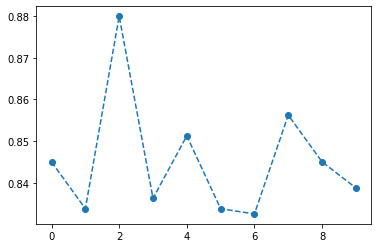

0.8452499959617853

In [8]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 25, epochs = 300)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
plt.plot(accuracies, '--o')
plt.show()
accuracies.mean()